# Evidencia Final: Herramientas Computacionales - Limpieza de datos
## Miembros del equipo:
- Vera Sofía Acevedo Gómez  A01747156
- Yael Michel García López  A01750911

In [2]:
# Importar librerías
import pandas as pd

In [3]:
# Leer el archivo
df = pd.read_csv("unis.csv")

## Exploración Inicial

Hallazgos:
- 2341 registros iniciales
- 12 columnas iniciales
- "No of student" declarada como object (debería ser numérico)
- "International Student" declarada como object (debería ser numérico)
- "OverAll Score" declarada como object (debería ser numérico)
- "Female:Male Ratio" seclarada como object (debería separar los valores y declararlos numéricos)
- Universidades sin "Rank"
- Registros con valores nulos

In [4]:
# Obtención de información general
df.info()

# 2341 registros iniciales
# 12 columnas iniciales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2341 non-null   object 
 1   Name of University           2233 non-null   object 
 2   Location                     2057 non-null   object 
 3   No of student                2209 non-null   object 
 4   No of student per staff      2208 non-null   float64
 5   International Student        2209 non-null   object 
 6   Female:Male Ratio            2128 non-null   object 
 7   OverAll Score                1799 non-null   object 
 8   Teaching Score               1799 non-null   float64
 9   Research Score               1799 non-null   float64
 10  Citations Score              1799 non-null   float64
 11  Industry Income Score        1799 non-null   float64
 12  International Outlook Score  1799 non-null   float64
dtypes: float64(6), obj

In [19]:
df.head(5)

# "No of student" declarada como object (debería ser numérico)
# "International Student" declarada como object (debería ser numérico)
# "OverAll Score" declarada como object (debería ser numérico)
# "Female:Male Ratio" seclarada como object (debería separar los valores y declararlos numéricos)
# Duplicidad de registros

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Students Percentage,Male Students Percentage
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,96.4,92.3,99.7,99.0,74.9,96.2,48.0,52.0
1,2,Harvard University,United States,"21,887",9.6,25%,95.2,94.8,99.0,99.3,49.5,80.5,50.0,50.0
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,94.8,90.9,99.5,97.0,54.2,95.8,47.0,53.0
3,4,Stanford University,United States,"16,164",7.1,24%,94.8,94.2,96.7,99.8,65.0,79.8,46.0,54.0
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,94.2,90.7,93.6,99.8,90.9,89.3,40.0,60.0


In [8]:
# Verificar duplicados
df[df.duplicated()]

# Duplicidad de registros

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score


## Limpieza de datos

In [7]:
# Eliminar duplicados
df = df.drop_duplicates()

In [9]:
# Verificar duplicidad en "Name of University"
df["Name of University"].describe()

# No hay duplicados

count                                    2233
unique                                   2233
top       Xi’an Jiaotong-Liverpool University
freq                                        1
Name: Name of University, dtype: object

In [20]:
# Verificar nulos
df.isna().sum()

University Rank                 0
Name of University              0
Location                        0
No of student                   0
No of student per staff         0
International Student           0
OverAll Score                   0
Teaching Score                  0
Research Score                  0
Citations Score                 0
Industry Income Score           0
International Outlook Score     0
Female Students Percentage     61
Male Students Percentage       61
dtype: int64

In [11]:
# Rellenar "University Rank" en orden numérico
df['University Rank'] = range(1, len(df) + 1)

In [12]:
# Eliminar registros nulos de "Name of University" ya que es una variable importante
df = df.dropna(subset=['Name of University'])

In [14]:
# Eliminar registros nulos de "Location" ya que es una variable importante
df = df.dropna(subset=['Location'])

In [16]:
# Eliminar registros nulos de "OverAll Score" ya que es una variable importante
df = df.dropna(subset=['OverAll Score'])

In [18]:
# División de "Female:Male Ratio"
# 1. Dividir la columna en dos y asignar los resultados a nuevas columnas 'Female Students Percentage' y 'Male Students Percentage'
df[['Female Students Percentage', 'Male Students Percentage']] = df['Female:Male Ratio'].str.split(':', expand=True)

# 2. Convertir las nuevas columnas a tipo numérico
df['Female Students Percentage'] = pd.to_numeric(df['Female Students Percentage'], errors='coerce')
df['Male Students Percentage'] = pd.to_numeric(df['Male Students Percentage'], errors='coerce')

# 3. Eliminar columna "Female:Male Ratio"
df = df.drop(columns=["Female:Male Ratio"])

## Analisis de estadística descriptiva para rellenar nulos

<Axes: >

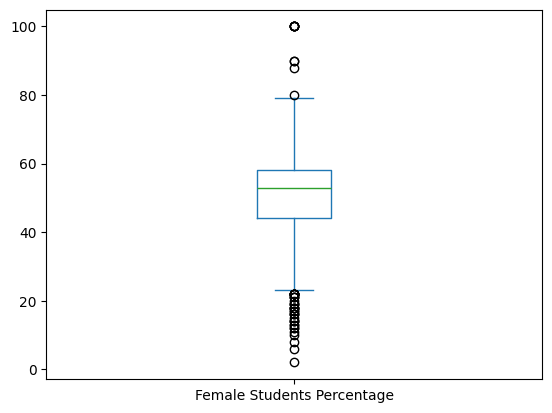

In [21]:
df["Female Students Percentage"].plot.box()


<Axes: ylabel='Frequency'>

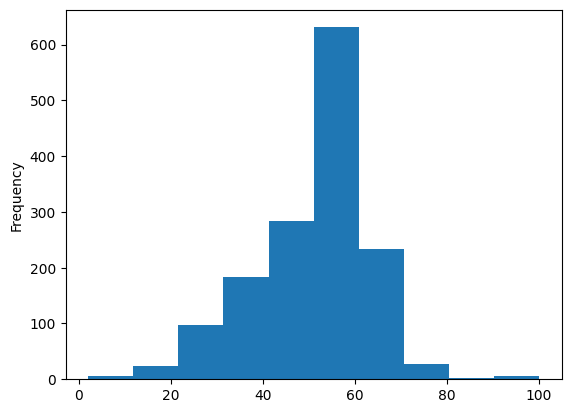

In [22]:
df["Female Students Percentage"].plot.hist()


<Axes: ylabel='Density'>

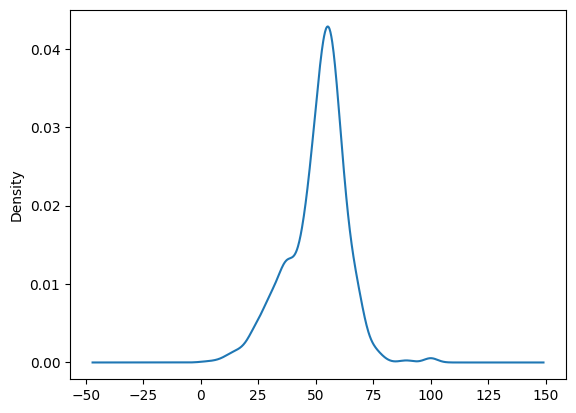

In [23]:
# Estimado de densidad de Kernel
df["Female Students Percentage"].plot.kde()


<Axes: >

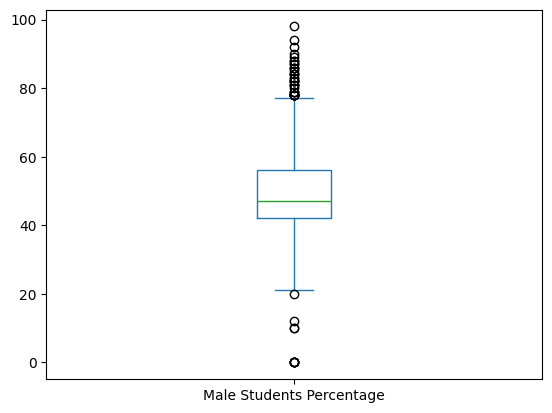

In [24]:
df["Male Students Percentage"].plot.box()

In [ ]:
df["Male Students Percentage"].plot.hist()

In [ ]:
df["Male Students Percentage"].plot.kde()

In [25]:
# Dado que hay muchos valores atípicos y se encuentran muy alejados del centro, se optó por usar la mediana

df = df.fillna({
    "Female Students Percentage": df["Female Students Percentage"].median(),
    "Male Students Percentage": df["Male Students Percentage"].median()
})

In [26]:
# Verificar nulos
df.isna().sum()

University Rank                0
Name of University             0
Location                       0
No of student                  0
No of student per staff        0
International Student          0
OverAll Score                  0
Teaching Score                 0
Research Score                 0
Citations Score                0
Industry Income Score          0
International Outlook Score    0
Female Students Percentage     0
Male Students Percentage       0
dtype: int64

## Conversión de tipo de dato (object --> numérico)

In [28]:
# "No of student" (object --> numérico)
df["No of student"] = pd.to_numeric(df["No of student"].str.replace(",", ""))

In [27]:
# "International Student" (object --> numérico)

# 1. Renombrar columna
df.rename(columns={'International Student': 'International Student Percentage'}, inplace=True)

# 2. Pasar a numérico
df['International Student Percentage'] = pd.to_numeric(df['International Student Percentage'].str.replace('%', ''))

In [29]:
# "OverAll Score" (object --> numérico)

# Función para convertir a numérico
def convert_overall_score(score):
    if '–' in score:  # Si hay un rango
        low, high = map(float, score.split('–'))  # Separa los valores y convierte a float
        return (low + high) / 2  # Devuelve el promedio
    return float(score)  # Si es un solo valor, lo convierte a float

# Aplicar la función a "OverAll Score" y reemplazar los valores
df['OverAll Score'] = df['OverAll Score'].apply(convert_overall_score)

# Conviertir la columna a tipo numérico
df['OverAll Score'] = pd.to_numeric(df['OverAll Score'])

## Creación de archivo csv limpio

In [30]:
# Guardamos un nuevo archivo con los cambios hechos
df.to_csv("unis_clean.csv", index=False)